### Import external dependencies.

In [26]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import zipfile

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from torchvision import transforms

### Import repo from repo github.
For more info about it, please refer to https://github.com/juanprida/image-classification

In [27]:
!cp -r ../input/image-classification-folder/* ./
from image_classification.cat_dog_dataset import CatDogDataset
from image_classification.alexnet import AlexNet
from image_classification.engine import Engine

### Get data and define constants.
We are working with Kaggle notebooks, you should add https://www.kaggle.com/competitions/dogs-vs-cats dataset.

In [28]:
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip',"r") as train:
    train.extractall()

train_dir = './train'
train_files = os.listdir(train_dir)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Execute model.

[1/30] Training loss: 0.6549	 Validation loss: 0.7798	 Validation accuracy: 0.5069
[2/30] Training loss: 0.5631	 Validation loss: 1.1230	 Validation accuracy: 0.5070
[3/30] Training loss: 0.4880	 Validation loss: 0.5627	 Validation accuracy: 0.7334
[4/30] Training loss: 0.4490	 Validation loss: 0.6074	 Validation accuracy: 0.7194
[5/30] Training loss: 0.3835	 Validation loss: 0.5383	 Validation accuracy: 0.7522
[6/30] Training loss: 0.3603	 Validation loss: 0.3723	 Validation accuracy: 0.8368
[7/30] Training loss: 0.3298	 Validation loss: 0.3471	 Validation accuracy: 0.8485
[8/30] Training loss: 0.3066	 Validation loss: 0.3782	 Validation accuracy: 0.8354
[9/30] Training loss: 0.2905	 Validation loss: 0.6171	 Validation accuracy: 0.7448
[10/30] Training loss: 0.2761	 Validation loss: 0.3154	 Validation accuracy: 0.8605
[11/30] Training loss: 0.2541	 Validation loss: 0.5834	 Validation accuracy: 0.7520
[12/30] Training loss: 0.2398	 Validation loss: 0.3762	 Validation accuracy: 0.8482
[

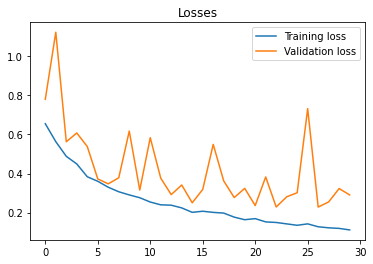

In [29]:
n_epochs = 30
learning_rate = 1e-4
weight_decay = 5e-4
batch_size = 1028

data_transform = transforms.Compose([
    transforms.Resize(227),
    transforms.ColorJitter(),
    transforms.RandomCrop(227),
    transforms.RandomHorizontalFlip(),
    transforms.Resize(227),
    transforms.ToTensor()
])

train_files, val_files = train_test_split(train_files)

train_data = CatDogDataset(train_files, train_dir, data_transform)
val_data = CatDogDataset(val_files, train_dir, data_transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)

model = AlexNet()
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

opt = Engine(model=model, loss_fn=loss_fn, optimizer=optimizer, device=device)
opt.train(train_loader, val_loader, n_epochs)
opt.plot_losses()